<a href="https://colab.research.google.com/github/widedben/Mise-en-place-d-une-poubelle-intelligente-avec-syst-me-de-r-compenses/blob/master/PFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Chemin vers les dossiers contenant les images
drive_path = '/content/drive/MyDrive/isi'

In [ ]:
batterie_folder = os.path.join(drive_path, 'battrie')
bouteille_folder = os.path.join(drive_path, 'dabouza')
cart_folder = os.path.join(drive_path, 'cart')

def charger_images(folder_path, target_list, max_images):
    for filename in os.listdir(folder_path):
        if len(target_list) >= max_images:
            break
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (150,150))
            image = image / 255.0
            target_list.append(image)

batterie_images = []
bouteille_images = []
cart_images = []

# Charger toutes les images de la classe "battrie"
charger_images(batterie_folder, batterie_images, 930)
# Charger toutes les images de la classe "bouteille"
charger_images(bouteille_folder, bouteille_images, 920)

# Charger 748 images de la classe "carton"
charger_images(cart_folder, cart_images, 926)

# Concaténer les trois listes d'images
all_images = batterie_images + bouteille_images + cart_images
# Créer les labels pour les images
all_labels = [0] * len(batterie_images) + [1] * len(bouteille_images) + [2] * len(cart_images)

# Suréchantillonnage de toutes les classes avec SMOTE
# Création d'une instance SMOTE pour le suréchantillonnage
smote = SMOTE()
# Convertir les images en un tableau 2D pour être compatible avec SMOTE
# Chaque ligne représente une image sous forme de vecteur 1D (150x150x3 valeurs pour chaque pixel RGB le 3 represente nombre de canaux de couleur)
all_images_resampled, all_labels_resampled = smote.fit_resample(np.array(all_images).reshape(-1, 150*150*3), all_labels)


In [ ]:
# Nombre d'images de la classe "batterie"
num_batterie_images = len(batterie_images)

# Nombre d'images de la classe "bouteille"
num_bouteille_images = len(bouteille_images)

# Nombre d'images de la classe "cart"
num_cart_images = len(cart_images)

# Afficher le nombre d'images de chaque classe
print("Nombre d'images de la classe 'batterie' :", num_batterie_images)
print("Nombre d'images de la classe 'bouteille' :", num_bouteille_images)
print("Nombre d'images de la classe 'cart' :", num_cart_images)


Nombre d'images de la classe 'batterie' : 930
Nombre d'images de la classe 'bouteille' : 920
Nombre d'images de la classe 'cart' : 926


In [ ]:
# Diviser les données en ensembles d'entraînement, de validation et de test
X_train, X_test, y_train, y_test = train_test_split(all_images_resampled, all_labels_resampled, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

# Convertir les données en tableaux NumPy
X_train_array = np.array(X_train)
X_validation_array = np.array(X_validation)
X_test_array = np.array(X_test)

# Convertir les labels en tableau NumPy
y_train_np = np.array(y_train)
y_validation_np = np.array(y_validation)
y_test_np = np.array(y_test)

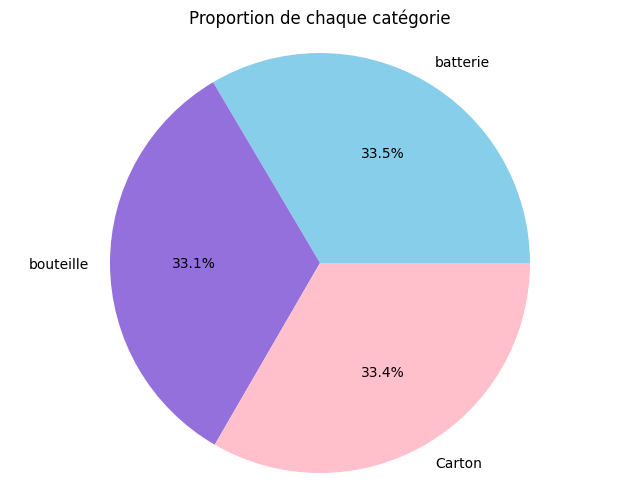

In [ ]:
import matplotlib.pyplot as plt

# Exemple de données de comptage pour chaque catégorie
train_counts = [num_batterie_images, num_bouteille_images, num_cart_images]  # Remplacez par vos données
class_names = ['batterie', 'bouteille', 'Carton']  # Remplacez par vos catégories

# Créer une liste d'éclatement (explode) avec la même longueur que train_counts
explode = [0] * len(train_counts)
colors = ['#87CEEB', '#9370DB', '#FFC0CB']  # Bleu ciel, mauve et rose

plt.figure(figsize=(8, 6))
plt.pie(train_counts,
        explode=explode,
        labels=class_names,
         colors=colors,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion de chaque catégorie')
plt.show()


In [ ]:
# Stocker le nombre de données dans des variables
nb_train = len(X_train)
nb_validation = len(X_validation)
nb_test = len(X_test)

# Afficher le nombre de données pour chaque ensemble
print("Nombre de données d'entraînement :", nb_train)
print("Nombre de données de validation :", nb_validation)
print("Nombre de données de test :", nb_test)


Nombre de données d'entraînement : 1953
Nombre de données de validation : 560
Nombre de données de test : 277


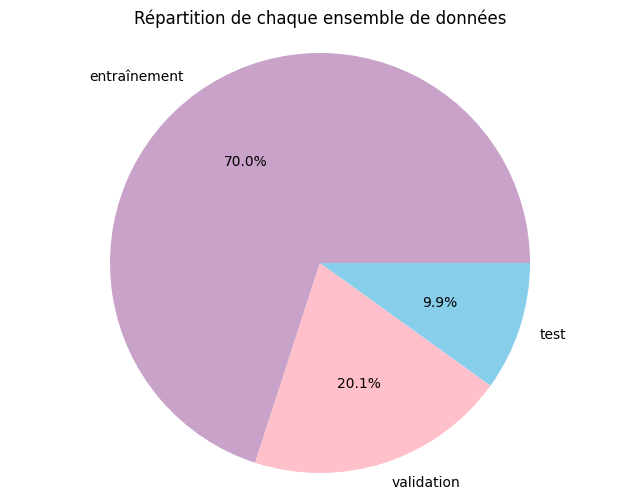

In [ ]:
import matplotlib.pyplot as plt

# Exemple de données de comptage pour chaque catégorie
train_counts = [nb_train, nb_validation, nb_test]  # Remplacez par vos données
class_names = ['entraînement', 'validation', 'test']  # Remplacez par vos catégories

# Créer une liste d'éclatement (explode) avec la même longueur que train_counts
explode = [0] * len(train_counts)
colors = ['#C8A2C8', '#FFC0CB', '#87CEEB']  # Bleu ciel, mauve et rose

plt.figure(figsize=(8, 6))
plt.pie(train_counts,
        explode=explode,
        labels=class_names,
        colors=colors,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Répartition de chaque ensemble de données')
plt.show()


In [ ]:
import numpy as np

# Calculer les pourcentages pour chaque classe
train_data = [(y_train == i).mean() * 100 for i in np.unique(y_train)]
validation_data = [(y_validation == i).mean() * 100 for i in np.unique(y_validation)]
test_data = [(y_test == i).mean() * 100 for i in np.unique(y_test)]
classes =['batterie', 'bouteille', 'Carton']  # Noms des classes

# Afficher les pourcentages
for i, classe in enumerate(classes):
    print(f"Classe : {classe}")
    print(f"Pourcentage d'entraînement : {train_data[i]:.2f} %")
    print(f"Pourcentage de validation : {validation_data[i]:.2f} %")
    print(f"Pourcentage de test : {test_data[i]:.2f} %")
    print()


Classe : batterie
Pourcentage d'entraînement : 33.79 %
Pourcentage de validation : 32.50 %
Pourcentage de test : 31.77 %

Classe : bouteille
Pourcentage d'entraînement : 33.08 %
Pourcentage de validation : 33.04 %
Pourcentage de test : 35.74 %

Classe : Carton
Pourcentage d'entraînement : 33.13 %
Pourcentage de validation : 34.46 %
Pourcentage de test : 32.49 %



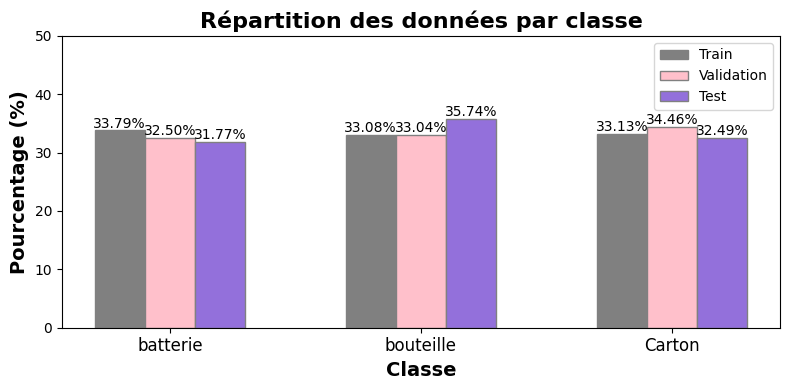

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Données
train_data = [33.79, 33.08, 33.13]  # Pourcentage de données d'entraînement pour chaque classe
validation_data = [32.50, 33.04, 34.46]  # Pourcentage de données de validation pour chaque classe
test_data = [31.77, 35.74, 32.49]  # Pourcentage de données de test pour chaque classe
classes = ['batterie', 'bouteille', 'Carton']  # Noms des classes

# Créer un histogramme
barWidth = 0.2  # Largeur des barres augmentée
r1 = np.arange(len(train_data))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(8, 4))  # Taille de la figure

plt.bar(r1, train_data, color='#808080', width=barWidth, edgecolor='grey', label='Train')
plt.bar(r2, validation_data, color='#FFC0CB', width=barWidth, edgecolor='grey', label='Validation')
plt.bar(r3, test_data, color='#9370DB', width=barWidth, edgecolor='grey', label='Test')

plt.xlabel('Classe', fontweight='bold', fontsize=14)
plt.xticks([r + barWidth for r in range(len(train_data))], classes, fontsize=12)

plt.ylabel('Pourcentage (%)', fontweight='bold', fontsize=14)
plt.title('Répartition des données par classe', fontweight='bold', fontsize=16)

plt.legend()

# Ajouter les pourcentages au-dessus des barres
for i in range(len(train_data)):
    plt.text(r1[i], train_data[i] + 0.5, f"{train_data[i]:.2f}%", color='black', ha='center', fontsize=10)
    plt.text(r2[i], validation_data[i] + 0.5, f"{validation_data[i]:.2f}%", color='black', ha='center', fontsize=10)
    plt.text(r3[i], test_data[i] + 0.5, f"{test_data[i]:.2f}%", color='black', ha='center', fontsize=10)

plt.ylim(0, 50)  # Définir les limites de l'axe y de 0 à 100

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers

# Créer le modèle CNN avec régularisation L2
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)),# 32 filtres
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Couche Dense avec régularisation L2
    Dropout(0.2),
    Dense(3, activation='softmax')  # Trois unités pour trois classes et softmax pour la classification multiclasse
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Convertir les données d'entraînement en images 32x32x3
X_train_reshaped = X_train_array.reshape(-1, 150,150, 3)
X_validation_reshaped = X_validation_array.reshape(-1, 150,150, 3)

# Entraîner le modèle
history = model.fit(X_train_reshaped, y_train_np, epochs=20,batch_size=32, validation_data=(X_validation_reshaped, y_validation_np))


Epoch 1/20
62/62 [==============================] - 112s 2s/step - loss: 1.8145 - accuracy: 0.7460 - val_loss: 0.7347 - val_accuracy: 0.8536
Epoch 2/20
62/62 [==============================] - 106s 2s/step - loss: 0.6418 - accuracy: 0.8740 - val_loss: 0.6350 - val_accuracy: 0.8536
Epoch 3/20
62/62 [==============================] - 111s 2s/step - loss: 0.5175 - accuracy: 0.8740 - val_loss: 0.5000 - val_accuracy: 0.9018
Epoch 4/20
62/62 [==============================] - 106s 2s/step - loss: 0.4722 - accuracy: 0.8817 - val_loss: 0.3748 - val_accuracy: 0.9161
Epoch 5/20
62/62 [==============================] - 109s 2s/step - loss: 0.4254 - accuracy: 0.8955 - val_loss: 0.5023 - val_accuracy: 0.8482
Epoch 6/20
62/62 [==============================] - 107s 2s/step - loss: 0.3806 - accuracy: 0.9032 - val_loss: 0.3643 - val_accuracy: 0.9268
Epoch 7/20
62/62 [==============================] - 110s 2s/step - loss: 0.3948 - accuracy: 0.9042 - val_loss: 0.3629 - val_accuracy: 0.9107
Epoch 8/20
62

In [ ]:
# Évaluer le modèle sur l'ensemble de test
X_test_reshaped = X_test_array.reshape(-1, 150,150, 3)
loss, accuracy = model.evaluate(X_test_reshaped, y_test_np)
print(f"Loss: {loss}, Accuracy: {accuracy}")



9/9 [==============================] - 3s 353ms/step - loss: 0.4005 - accuracy: 0.8989
Loss: 0.40051475167274475, Accuracy: 0.8989169597625732


9/9 [==============================] - 8s 905ms/step


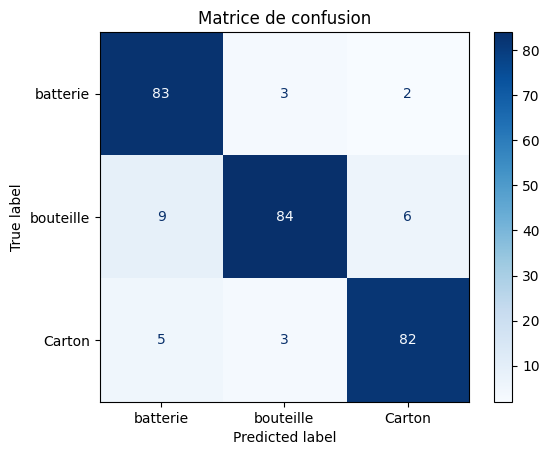

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test_np, y_pred_classes)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['batterie', 'bouteille', 'Carton']) # Création d'un objet pour afficher la matrice de confusion avec les labels correspondants
disp.plot(cmap=plt.cm.Blues, values_format='d') # Affichage de la matrice de confusion avec un dégradé de couleurs bleues
plt.title('Matrice de confusion')
plt.show()


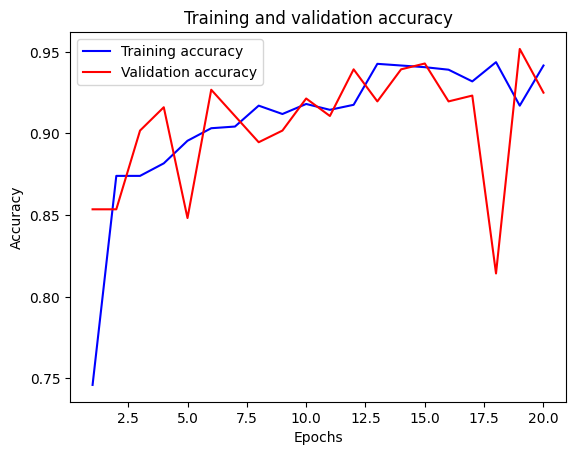

In [ ]:
import matplotlib.pyplot as plt
# Obtenir l'accuracy sur les epochs
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Tracer la courbe d'accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
# Enregistrer le modèle
model.save('/content/drive/MyDrive/mod.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf

# Charger le modèle
model = tf.keras.models.load_model('/content/drive/MyDrive/mod.h5')


In [ ]:
# Convertir le modèle en format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Écrire le modèle TFLite dans un fichier
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
from google.colab import files

files.download('model.tflite')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import os

# Enregistrer le modèle en format .h5
h5_model_path = '/content/drive/MyDrive/mod.h5'
model.save(h5_model_path)

# Charger le modèle
model = tf.keras.models.load_model(h5_model_path)

# Convertir le modèle en format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Écrire le modèle TFLite dans un fichier
tflite_model_path = '/content/drive/MyDrive/model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

# Obtenir les tailles des fichiers
h5_size = os.path.getsize(h5_model_path)
tflite_size = os.path.getsize(tflite_model_path)

# Convertir les tailles en kilo-octets (KB)
h5_size_kb = h5_size / 1024
tflite_size_kb = tflite_size / 1024

# Afficher les tailles des fichiers
print(f"Taille du fichier .h5: {h5_size_kb:.2f} KB")
print(f"Taille du fichier .tflite: {tflite_size_kb:.2f} KB")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Taille du fichier .h5: 112131.09 KB
Taille du fichier .tflite: 37364.24 KB


In [ ]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from google.colab import drive

# Monter Google Drive
drive.mount('/content/drive')

# Charger le modèle entraîné
model_path = '/content/drive/MyDrive/mod.h5'
model = load_model(model_path)

# Charger et prétraiter l'image à prédire
def preprocess_image(image_path):
    # Charger l'image
    image = Image.open(image_path)
    # Convertir en RGB
    image = image.convert('RGB')
    # Redimensionner en 32x32 pixels
    image = image.resize((150,150))
    # Convertir en tableau NumPy
    image_array = np.array(image)
    # Normaliser l'image
    image_array = image_array / 255.0  # Supposons que les valeurs initiales étaient entre 0 et 255
    return image_array

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Charger l'image
filename = '/content/drive/MyDrive/test batterie/bat12.png'
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir l'image en RGB (si nécessaire)

# Redimensionner l'image
image = cv2.resize(image, (150, 150))

# Normaliser l'image
image = image / 255.0  # Supposons que les valeurs initiales étaient entre 0 et 255

# Effectuer l'inférence avec le modèle
predictions = model.predict(np.array([image]))
predicted_class = np.argmax(predictions)

# Mapping des indices de classe aux noms de classe
class_mapping = {0: 'Battrie', 1: 'Bouteille', 2: 'carton'}

# Afficher la prédiction
if predicted_class in class_mapping:
    print("Classe prédite :", class_mapping[predicted_class])
else:
    print("Classe prédite : Classe inconnue")


1/1 [==============================] - 0s 147ms/step
Classe prédite : Battrie


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
import cv2
import numpy as np

def preprocess_image(image):
    # Prétraiter l'image ici (redimensionner, normaliser, etc.)
    # Assurez-vous que l'image a les bonnes dimensions pour votre modèle
    image = cv2.resize(image, (150,150))
    image = image / 255.0  # Normaliser les valeurs des pixels entre 0 et 1
    return image

try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Charger l'image
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir l'image en RGB (si nécessaire)

    # Prétraiter l'image
    preprocessed_image = preprocess_image(image)

    # Effectuer l'inférence avec le modèle
    predictions = model.predict(np.array([preprocessed_image]))
    predicted_class = np.argmax(predictions)

    # Mapping des indices de classe aux noms de classe
    class_mapping = {0: 'Battrie', 1: 'Bouteille', 2: 'carton'}

    # Afficher la prédiction
    if predicted_class in class_mapping:
        print("Classe prédite :", class_mapping[predicted_class])
    else:
        print("Classe prédite : Classe inconnue")

    # Afficher l'image capturée
    display(Image(filename))
except Exception as err:
    print(str(err))


<IPython.core.display.Javascript object>